# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch

In [2]:
DEVICE = 'cuda:0'
NDIM = 2  # Dimensionality of parameter z
NROUNDS = 2  # Optimization rounds
N_TRAIN = 1000
N_BATCH = 32

In [3]:
# Generative model, x~p(x|z)
def model(z, sigma = 0.01):
    z = z - 0.5
    x = (z**2).sum()**0.5
    n = np.random.randn(*x.shape)*sigma    
    return np.array([x + n])

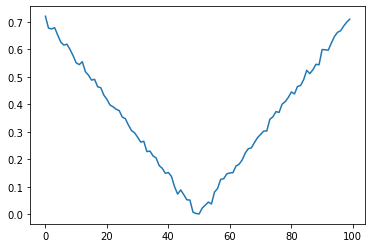

In [4]:
z = np.linspace(0, 1, 100)
z = z.repeat(2).reshape(100,2)
x = [model(z0) for z0 in z]
plt.plot(x)

In [5]:
z0 = np.ones(NDIM)*0.6
x0 = model(z0, sigma = 1e-6)
x0

array([0.14142213])

In [14]:
sw = swyft.SWYFT(model, NDIM, x0, device = DEVICE)

In [15]:
for i in range(NROUNDS):
    N_TRAIN = 2000
    N_BATCH = 64
    sw.round(n_sims = 10000, n_train = [N_TRAIN, N_TRAIN, N_TRAIN],
             lr = [1e-3,1e-4,1e-5], n_batch = N_BATCH)

  6%|▌         | 597/10000 [00:00<00:01, 5103.38it/s]

Round:  0
Generate samples from constrained prior: z~pc(z)
Generate corresponding draws x ~ p(x|z)


  1%|          | 11/1000 [00:00<00:09, 101.97it/s]

Network optimization


100%|██████████| 1000/1000 [00:09<00:00, 104.72it/s]


Round:  1
Generate samples from constrained prior: z~pc(z)


100%|██████████| 10000/10000 [00:00<00:00, 56945.04it/s]

Constrained posterior volume: 0.2088031
Generate corresponding draws x ~ p(x|z)



  1%|          | 11/1000 [00:00<00:09, 100.70it/s]

Network optimization


100%|██████████| 1000/1000 [00:09<00:00, 102.89it/s]


In [28]:
combinations = [[0, 1]]
N_TRAIN = 2000
N_BATCH = 64
tmp, losses = sw.square(n_train = [N_TRAIN, N_TRAIN, N_TRAIN],
                        combinations = combinations, n_batch = N_BATCH)

100%|██████████| 2000/2000 [00:21<00:00, 93.24it/s]


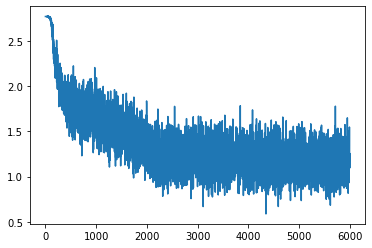

In [29]:
plt.plot(losses)

In [30]:
zp = tmp[0]['z']
xp = tmp[0]['lnL']

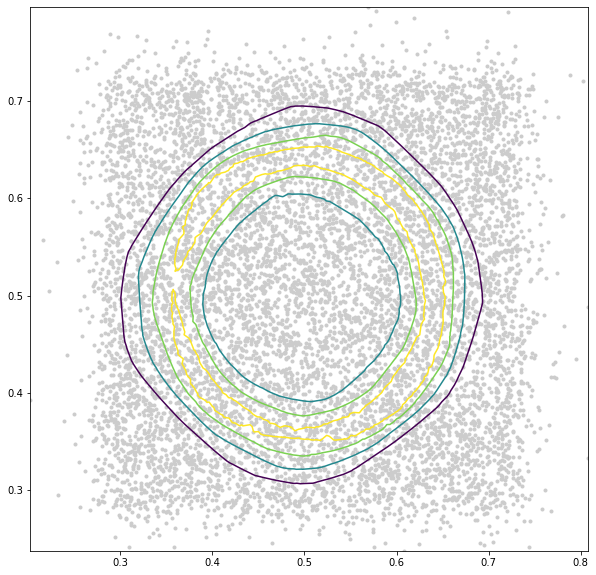

In [31]:
plt.figure(figsize = (10, 10))
plt.scatter(zp[:,0], zp[:,1], marker='.', color='0.8')
plt.tricontour(zp[:,0], zp[:,1], (xp - xp.max())*2, levels = [-16,-9, -4, -1])